# Supersymmetric harmonic oscillator

As a warmup, lets go through the steps to get from the Hamiltonian of this system to a quantum circuit that lets us evolve states according to the time evolution operator.

The superpotential is 
\begin{equation}
    W(\hat{q}) = \frac{1}{2}m \hat{q}^2
\end{equation}
which leads to the following Hamiltonian,
\begin{equation}
    H = \frac{1}{2}\left(H_B+H_F\right), \quad 
        H_B=\hat{p}^2+m^2\hat{q}^2, \quad H_F=m\left[\hat{b}^{\dagger},\hat{b}\right].
\end{equation}
This contains two terms, a bosonic piece and a fermionic piece.  For the bosonic part, we could work in the position or momentum basis, but this is just the Hamiltonian for a harmonic oscillator, so lets convert to the number basis.  


In [38]:
import sympy as sp

p, q = sp.symbols('p, q', commutative=False)
m = sp.Symbol('m')

h_b = 0.5*(p*p + m*m*q*q)

a, adag = sp.symbols('a, ad', commutative=False)
q_also = 0.5*sp.sqrt(2/m)*(a + adag)
p_also = complex(0,1)*sp.sqrt(2*m)*(adag - a)/2

print('Original H = ' + str(h_b))
h_harmonic = sp.expand(h_b.subs({q: q_also, p: p_also}))
print('Using creation/annihlation operators H = ' + str(h_harmonic))

Original H = 0.5*(m**2*q**2 + p**2)
Using creation/annihlation operators H = 0.5*m*a*ad + 0.5*m*ad*a


And we know the matrix elements of $A$ and $A^{\dagger}$, they are defined in HamiltonianTerms.  We of course must impose a cutoff at this point, truncating the allowed excitations of the harmonic oscillator

In [42]:
import sys
sys.path.append('..')
import src.HamiltonianTerms as hmats

import numpy as np

In [54]:
h_matrix = h_harmonic.subs({
                           a*adag: sp.Matrix(hmats.a(5)*hmats.adag(5)),
                           adag*a: sp.Matrix(hmats.adag(5)*hmats.a(5))
                           })

matrix = np.array(h_matrix.subs({m: 1}).tolist())[:-1,:-1]
print(matrix)

[[0.500000000000000 0 0 0]
 [0 1.50000000000000 0 0]
 [0 0 2.50000000000000 0]
 [0 0 0 3.50000000000000]]


Now that we have the expression as a matrix, we can convert it to pauli strings, see \textbf{MatrixToPauliStrings} for the details.  

In [56]:
from src.MatrixToPauliString import *
from src.BinaryEncodings import *

pauli_strings = matrix_to_pauli_strings(matrix, standard_encode)
print(sp.expand(pauli_strings))

2.0*I^0*I^1 - 1.0*I^0*Z^1 - 0.5*I^1*Z^0 - 5.55111512312578e-17*Z^0*Z^1


But we can't forget about the fermionic piece!  We will always add the fermion onto the qubit after the highest numbered qubit for the boson.  

In [59]:
from src.sympy_utilities import *

fermion_qubit = max_sympy_exponent(pauli_strings) + 1

In [ ]:
# TODO FINISH THIS SECTION

In [8]:
zfermion=sp.symbols('Z^'+str(max_sympy_exponent(expr)+1))
idfermion=sp.symbols('I^'+str(max_sympy_exponent(expr)+1))
xfermion=sp.symbols('X^'+str(max_sympy_exponent(expr)+1))
yfermion=sp.symbols('Y^'+str(max_sympy_exponent(expr)+1))

In [9]:
new_physics = sp.expand(expr*zfermion)

In [10]:
qc=PauliStringsToQISKITCircuit(new_physics)
qc.string_to_terms()
print(qc.pauli_strings)

4.0*I^0*I^1*I^2*Z^3 - 2.0*I^0*I^1*Z^2*Z^3 - 1.0*I^0*I^2*Z^1*Z^3 - 0.5*I^1*I^2*Z^0*Z^3


In [11]:
qc.make_qiskit_circuit(1)

4


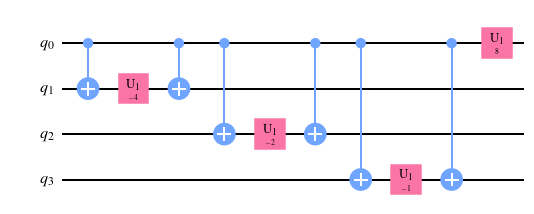

In [12]:
qc.circuit.draw(output="mpl")